In [1]:
import numpy as np
import matplotlib.pyplot as plt

import xobjects as xo
import xtrack as xt

In [2]:
## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 0.5], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.Multipole(knl=[0, -0.5], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

In [3]:
sv = line.survey()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


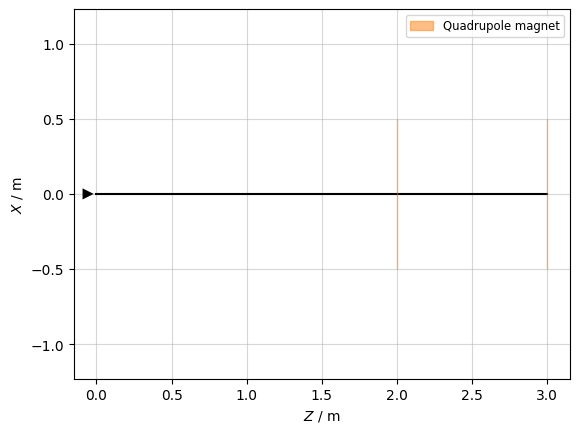

In [4]:
import xplt
xplt.FloorPlot(sv, line)
plt.legend(fontsize='small', loc='upper right')

In [5]:
## Attach a reference particle to the line (optional)
## (defines the reference mass, charge and energy)
line.particle_ref = xt.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xt.PROTON_MASS_EV)

In [6]:
## Choose a context
context = xo.ContextCpu()         # For CPU
# context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs

In [7]:
## Transfer lattice on context and compile tracking code
line.build_tracker(_context=context)

The line already has an associated tracker


In [8]:
## Compute lattice functions
tw = line.twiss(method='4d')
tw.show()

name                   s             x            px             y            py          zeta ...
drift_0                0             0             0             0             0             0
quad_0                 2             0             0             0             0             0
drift_1                2             0             0             0             0             0
quad_1                 3             0             0             0             0             0
_end_point             3             0             0             0             0             0


In [9]:
n_part = 200
particles = line.build_particles(
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part))
particles

Particles(_capacity=np.int64(200), _num_active_particles=np.int64(200), _num_lost_particles=np.int64(0), start_tracking_at_element=np.int64(-1), q0=1, mass0=9.38e+08, t_sim=1e-08, _p0c=array([6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12,
       6.5e+12, 6.5e+12, 6.5e+12, 6.5e+12, 6.

In [10]:
n_turns = 5000
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor=True)

In [11]:
print(line.record_last_track.x)
print(line.record_last_track.px)

#line.record_last_track.x -> stores the x transverse positions of each particle for each turn
# on a two dimensional array with rows being each particle and columns being each turn.

#example: line.record_last_track.x[4,7] -> returnes the x value for the 5th particle (index=4), for its 8th turn (index=7)

[[ 8.82007104e-05  6.36329561e-05  7.24995216e-06 ...  1.86197303e-05
   7.10441191e-05  8.79478198e-05]
 [ 6.16301336e-04  2.90771500e-04 -1.80131095e-04 ...  3.03813021e-04
   6.21800448e-04  6.28915431e-04]
 [ 5.22286752e-04  2.64930053e-04 -1.24868562e-04 ...  1.45493270e-04
   4.64295816e-04  5.50990955e-04]
 ...
 [-9.01938271e-04 -4.36281999e-04  2.47543539e-04 ... -7.42925364e-04
  -9.72032870e-04 -7.15060964e-04]
 [-6.14491638e-04 -2.99569868e-04  1.65110561e-04 ... -1.88308991e-04
  -5.60393466e-04 -6.52330360e-04]
 [ 9.50741386e-04  4.78398018e-04 -2.33117135e-04 ...  3.80669784e-04
   9.07692450e-04  9.80920543e-04]]
[[ 9.76596908e-06 -1.22836886e-05 -2.81917391e-05 ...  3.08673350e-05
   2.62127903e-05  8.45235635e-06]
 [-8.69666196e-06 -1.62765307e-04 -2.35458570e-04 ...  2.34948824e-04
   1.59004210e-04  3.56459547e-06]
 [ 1.88203011e-06 -1.28678185e-04 -1.94910533e-04 ...  1.95779957e-04
   1.59418352e-04  4.33614766e-05]
 ...
 [ 7.32872227e-06  2.32827661e-04  3.4189768

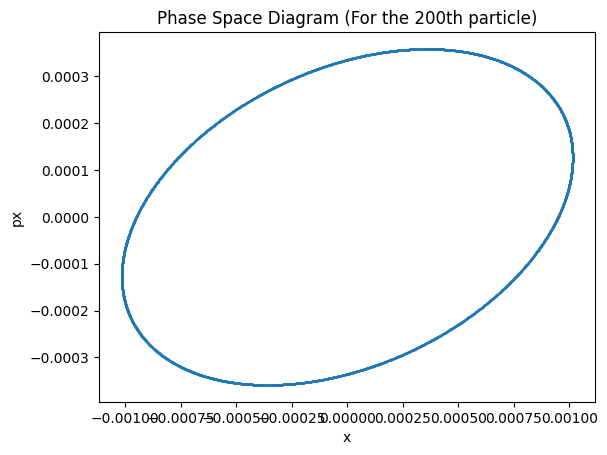

In [12]:
plt.plot(line.record_last_track.x[199,:], line.record_last_track.px[199,:], '.' , markersize=1, color='C0')

plt.xlabel('x')
plt.ylabel('px')
plt.title('Phase Space Diagram (For the 200th particle)')

plt.show()